<a href="https://colab.research.google.com/github/sol-commits/apartment_transaction_price_analysis/blob/main/seoul_park_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [70]:
# !pip install koreanize_matplotlib

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# Data

In [3]:
CITY = '서울특별시'

In [4]:
DATA_PATH = '/content/drive/MyDrive/my_ws/edu/data_analysis/apartment_transaction_price_analysis/data'

In [5]:
park_df = pd.read_csv(f'{DATA_PATH}/{CITY}/park_df.csv')

In [7]:
dong_avg_housing_stats = pd.read_csv(f'{DATA_PATH}/{CITY}/dong_avg_housing_stats.csv')

# Functions & Variables

# Code

In [8]:
park_df.dropna().head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
214,서울특별시,동대문구,장안동,장안,근린공원,14744.80,"""배드민턴장, 족구장, 게이트볼장, 농구장 반코트""","""조합놀이대, 그네""","""정자, 벤치, 화장실""",독서실,"""바닥분수, 계류""",1988.0,2018-03-31
222,서울특별시,동대문구,전농동,배봉산,근린공원,265582.00,"""배드민턴장, 지압보도""","""조합놀이대, 그네, 흔들놀이대, 숲속놀이터, 모래놀이터""","""정자, 벤치, 화장실""",야외공연장,"""황톳길,무장애길,야생화단지,유아숲체험장""",1997.0,2018-03-31
255,서울특별시,성동구,옥수동,달맞이,근린공원,63411.43,"""배드민턴장 2개소, 체력단련시설 6개소 36개""","""조합놀이대 1기, 시소 2개""",화장실 1개소,없음,없음,1940.0,2018-08-13
256,서울특별시,성동구,하왕십리동,무학봉,근린공원,28843.00,"""배드민턴장 1개소, 농구장 1개소, 체력단련시설 3개소 29개""",없음,화장실 1개소,없음,없음,1977.0,2018-08-13
257,서울특별시,성동구,용답동,용답휴식,근린공원,6046.90,"""배드민턴장 1개소, 농구정 1개소, 체력단련시설 1개소 7개""",없음,화장실 1개소,없음,없음,1963.0,2018-08-13


## park_cultural_facitiy -> park_cultural_facility 컬럼 오타 수정

In [9]:
park_df.rename(columns={'park_cultural_facitiy': 'park_cultural_facility'}, inplace=True)

In [12]:
len(park_df)

930

## 공원 정보와 동 아파트 정보 결합

In [11]:
dong_park_stats = pd.merge(park_df, dong_avg_housing_stats, on='dong')
display(dong_park_stats.head(1))
len(dong_park_stats)

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facility,park_facility_other,park_open_year,reference_date,exclusive_use_area,transaction_real_price,real_price_per_m2
0,서울특별시,서초구,반포동,반 포,근린공원,26092.2,NaN,NaN,NaN,NaN,NaN,1981.0,2018-06-30,105.939548,132489.395651,1286.040375


923

- `dong_avg_housing_stats`에 관악구 아파트 정보가 없어 `dong_park_stats`에는 관악구 데이터가 없음

In [15]:
park_df[~park_df['dong'].isin(pd.merge(park_df, dong_avg_housing_stats, on='dong')['dong'])]

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facility,park_facility_other,park_open_year,reference_date
116,서울특별시,관악구,청룡동,송학,어린이공원,1013.0,NaN,조합놀이대,NaN,NaN,NaN,1971.0,2018-08-16
117,서울특별시,관악구,청룡동,비안,어린이공원,1661.0,NaN,그네+조합놀이대+시소+흔들말,NaN,NaN,NaN,1972.0,2018-08-16
119,서울특별시,관악구,청룡동,용담,어린이공원,646.0,NaN,그네+흔들말+조합놀이대+오르는기구,NaN,NaN,NaN,1977.0,2018-08-16
120,서울특별시,관악구,청룡동,일선,어린이공원,1244.0,NaN,그네+흔들말+조합놀이대,NaN,NaN,NaN,1972.0,2018-08-16
121,서울특별시,관악구,청룡동,청룡,어린이공원,853.0,NaN,미끄럼틀+흔들말+조합놀이대,NaN,NaN,NaN,1972.0,2018-08-16
123,서울특별시,관악구,청룡동,충효,어린이공원,3188.0,NaN,그네+흔들말+조합놀이대,NaN,NaN,NaN,1979.0,2018-08-16
125,서울특별시,관악구,청룡동,영락,어린이공원,206.0,NaN,흔들말+조합놀이대,NaN,NaN,NaN,1983.0,2018-08-16


## 공원의 면적, 개원 연도와 집값과의 상관관계

In [16]:
dong_park_stats.corr(numeric_only=True)

,park_area,park_open_year,exclusive_use_area,transaction_real_price,real_price_per_m2
park_area,1.000000,-0.079988,-0.051322,-0.071552,-0.074629
park_open_year,-0.079988,1.000000,0.030025,-0.005846,-0.037075
exclusive_use_area,-0.051322,0.030025,1.000000,0.661362,0.244530
transaction_real_price,-0.071552,-0.005846,0.661362,1.000000,0.868431
real_price_per_m2,-0.074629,-0.037075,0.244530,0.868431,1.000000


### heatmap

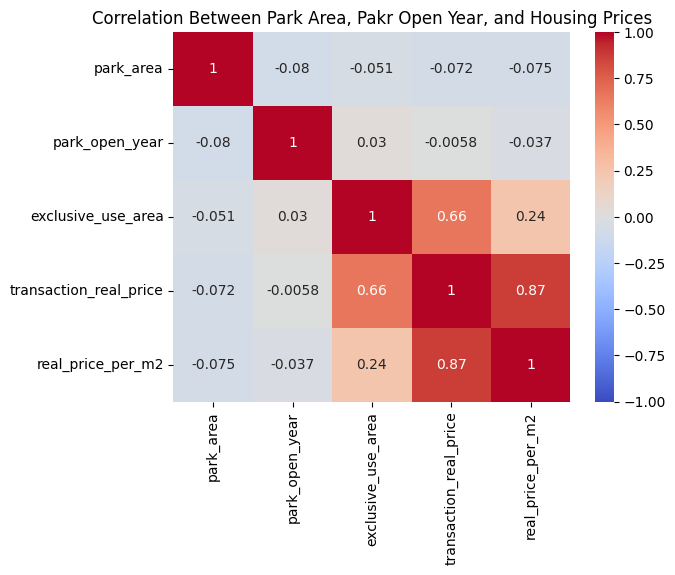

In [18]:
sns.heatmap(data=dong_park_stats.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Park Area, Pakr Open Year, and Housing Prices")
plt.show()

## 동별 공원 최근 개원 연도, 가장 오래된 개원 연도, 평균 면적, 총 면적, 총 공원 수와 집값의 상관관계

### 동별 공원 최근 개원 연도, 가장 오래된 개원 연도, 평균 면적, 총 면적, 총 공원 수 계산

In [22]:
grouped_dong_park_stats = park_df.groupby('dong').agg(
    oldest_open_year=('park_open_year', 'min'),
    recent_open_year=('park_open_year', 'max'),
    average_park_area=('park_area', 'mean'),
    total_park_area=('park_area', 'sum'),
    park_count=('park_area', 'count'),
).reset_index()

In [23]:
display(grouped_dong_park_stats.head(1))
len(grouped_dong_park_stats)

,dong,oldest_open_year,recent_open_year,average_park_area,total_park_area,park_count
0,가락동,NaN,NaN,7914.030769,102882.4,13


162

In [27]:
len(park_df['dong'].unique())

162

In [33]:
dong_park_housing_data = pd.merge(dong_avg_housing_stats, grouped_dong_park_stats)

### 상관관계 확인

In [34]:
dong_park_housing_data.corr(numeric_only=True)

,exclusive_use_area,transaction_real_price,real_price_per_m2,oldest_open_year,recent_open_year,average_park_area,total_park_area,park_count
exclusive_use_area,1.000000,0.704022,0.235093,0.107950,0.180024,-0.132129,-0.086373,0.061573
transaction_real_price,0.704022,1.000000,0.832620,0.057722,0.085043,-0.121845,-0.120876,0.162785
real_price_per_m2,0.235093,0.832620,1.000000,-0.042068,-0.062663,-0.120951,-0.136578,0.199581
oldest_open_year,0.107950,0.057722,-0.042068,1.000000,0.549172,-0.008618,-0.024998,-0.104533
recent_open_year,0.180024,0.085043,-0.062663,0.549172,1.000000,-0.050611,0.133071,0.251471
average_park_area,-0.132129,-0.121845,-0.120951,-0.008618,-0.050611,1.000000,0.897435,-0.111225
total_park_area,-0.086373,-0.120876,-0.136578,-0.024998,0.133071,0.897435,1.000000,0.096671
park_count,0.061573,0.162785,0.199581,-0.104533,0.251471,-0.111225,0.096671,1.000000


#### heatmap

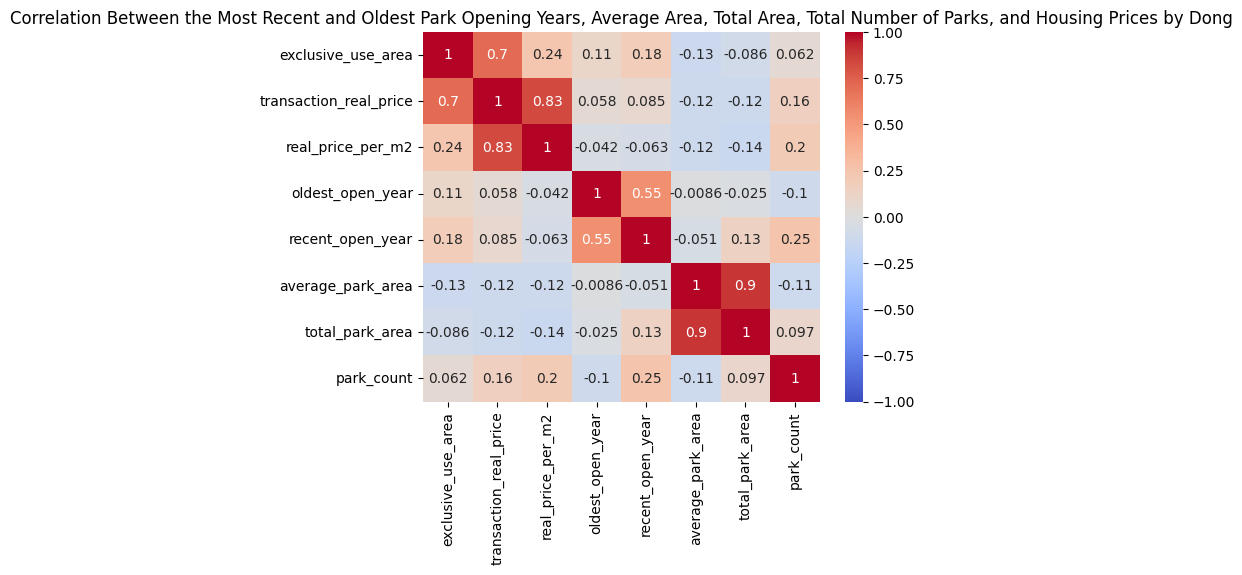

In [35]:
sns.heatmap(data=dong_park_housing_data.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between the Most Recent and Oldest Park Opening Years, Average Area, Total Area, Total Number of Parks, and Housing Prices by Dong")
plt.show()

## 동별 공원타입 개수도 포함해서 상관관계 확인

### 공원 타입 확인

In [31]:
np.unique(park_df['park_type'])

array(['근린공원', '기타', '도시농업공원', '문화공원', '소공원', '수변공원', '어린이공원', '역사공원',
       '체육공원'], dtype=object)

### 동별 공원타입 개수 계산

In [54]:
park_type_cnt_by_dong = park_df.pivot_table('city', 'dong', 'park_type', aggfunc='count').fillna(0)
display(park_type_cnt_by_dong.head(1))
len(park_type_cnt_by_dong)

park_type,근린공원,기타,도시농업공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
dong,,,,,,,,,
가락동,5.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0


162

In [56]:
grouped_dong_park_stats.set_index('dong', inplace=True)

In [57]:
park_analysis_by_dong = pd.concat([park_type_cnt_by_dong, grouped_dong_park_stats], axis=1)
display(park_analysis_by_dong.head(1))
len(park_analysis_by_dong)

,근린공원,기타,도시농업공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원,oldest_open_year,recent_open_year,average_park_area,total_park_area,park_count
dong,,,,,,,,,,,,,,
가락동,5.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,NaN,NaN,7914.030769,102882.4,13


162

In [58]:
dong_avg_housing_stats.set_index('dong', inplace=True)

In [62]:
apt_park_analysis_by_dong = pd.concat([dong_avg_housing_stats, park_analysis_by_dong], axis=1)
display(apt_park_analysis_by_dong.head(1))
len(apt_park_analysis_by_dong)

,exclusive_use_area,transaction_real_price,real_price_per_m2,근린공원,기타,도시농업공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원,oldest_open_year,recent_open_year,average_park_area,total_park_area,park_count
dong,,,,,,,,,,,,,,,,,
가락동,67.629924,54967.955681,898.943953,5.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,NaN,NaN,7914.030769,102882.4,13.0


331

### 상관관계 확인

In [65]:
apt_park_analysis_by_dong.corr()

,exclusive_use_area,transaction_real_price,real_price_per_m2,근린공원,기타,도시농업공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원,oldest_open_year,recent_open_year,average_park_area,total_park_area,park_count
exclusive_use_area,1.000000,0.758367,0.129804,0.065763,-0.051967,-0.117318,-0.006375,0.123673,0.029988,0.024809,0.134509,-0.192371,0.107950,0.180024,-0.132129,-0.086373,0.061573
transaction_real_price,0.758367,1.000000,0.681926,0.258673,-0.156934,-0.095637,-0.046216,0.133198,0.071751,0.078599,0.144557,-0.091641,0.057722,0.085043,-0.121845,-0.120876,0.162785
real_price_per_m2,0.129804,0.681926,1.000000,0.341637,-0.183373,-0.090105,-0.043553,0.078226,0.092158,0.105739,0.120952,-0.048741,-0.042068,-0.062663,-0.120951,-0.136578,0.199581
근린공원,0.065763,0.258673,0.341637,1.000000,0.056672,-0.079422,0.206987,0.032801,0.186651,0.442927,-0.049486,-0.055985,-0.014194,0.166804,-0.076118,0.112338,0.729320
기타,-0.051967,-0.156934,-0.183373,0.056672,1.000000,-0.027639,0.048115,0.058974,-0.033957,-0.021952,-0.013315,-0.019483,-0.038481,0.117967,0.001839,0.190117,0.156527
도시농업공원,-0.117318,-0.095637,-0.090105,-0.079422,-0.027639,1.000000,-0.022675,-0.058669,-0.015357,-0.090519,-0.023760,-0.008811,NaN,NaN,0.964088,0.827545,-0.095414
문화공원,-0.006375,-0.046216,-0.043553,0.206987,0.048115,-0.022675,1.000000,0.004663,-0.027858,-0.090310,-0.043099,-0.015984,-0.029141,0.032716,-0.005316,0.175874,0.059665
소공원,0.123673,0.133198,0.078226,0.032801,0.058974,-0.058669,0.004663,1.000000,-0.031953,-0.049056,-0.058304,0.096782,0.084097,0.359559,-0.065140,-0.021110,0.187125
수변공원,0.029988,0.071751,0.092158,0.186651,-0.033957,-0.015357,-0.027858,-0.031953,1.000000,0.177938,-0.029191,-0.010826,0.007542,0.065314,-0.020772,-0.005647,0.212470
어린이공원,0.024809,0.078599,0.105739,0.442927,-0.021952,-0.090519,-0.090310,-0.049056,0.177938,1.000000,-0.039327,-0.063808,-0.137018,0.133370,-0.117607,0.010232,0.891211


### heatmap

- 근린공원의 개수나 여부가 집값과 연관이 조금 있는 듯

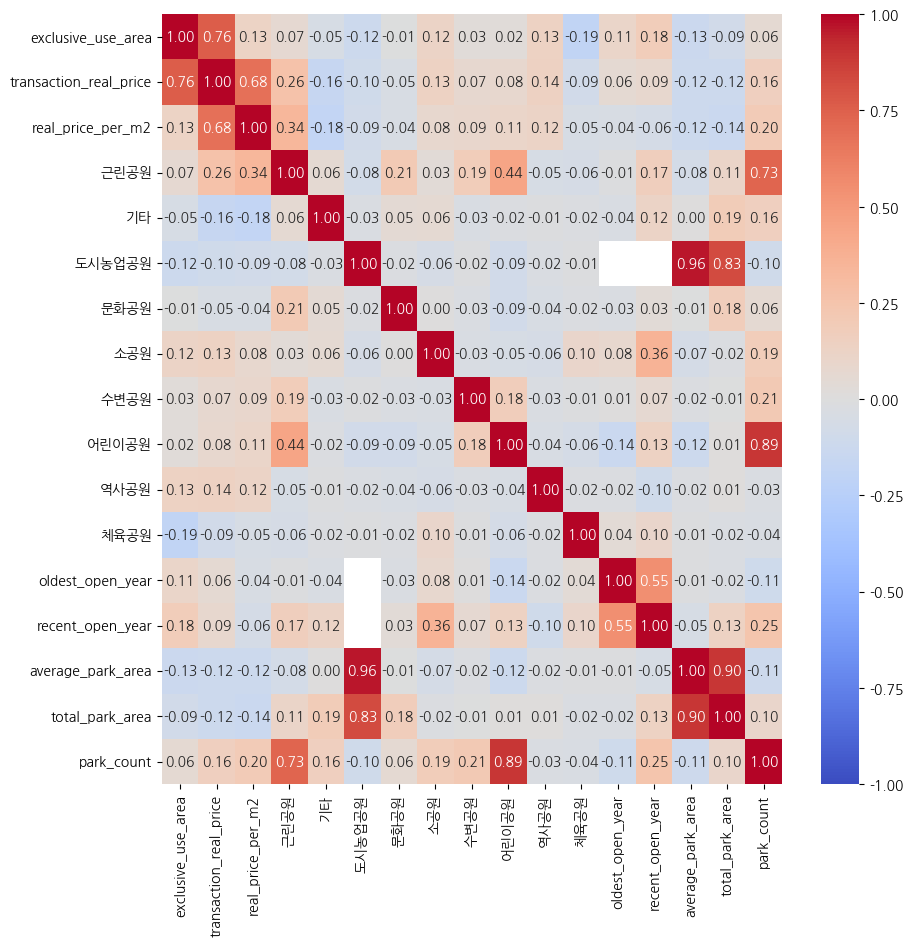

In [71]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=apt_park_analysis_by_dong.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### average_park_area와 도시농업공원은 상관관계가 왜 높을까?

- 도시농업공원의 데이터가 2개밖에 없고, 이 2개의 면적이 다른 공원에 비해 압도적으로 크기도 큼

In [72]:
pd.options.display.float_format = '{:.2f}'.format

In [73]:
park_df.groupby('park_type').mean(numeric_only=True)

,park_area,park_open_year
park_type,,
근린공원,83060.73,1987.53
기타,310566.56,1997.44
도시농업공원,6013531.00,NaN
문화공원,14359.95,1974.00
소공원,1365.72,2006.80
수변공원,9874.80,2009.00
어린이공원,1641.02,1980.89
역사공원,31407.46,1982.00
체육공원,29682.00,1987.00


In [ ]:
seoul_park_df.groupby('park_type').count()

,city,gu,dong,park_name,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facility,park_facility_other,park_open_year,reference_date
park_type,,,,,,,,,,,,
근린공원,241,241,241,241,241,54,30,50,24,25,126,241
기타,31,31,31,31,31,6,10,8,4,5,18,31
도시농업공원,2,2,2,2,2,0,0,0,0,2,0,2
문화공원,8,8,8,8,8,0,1,3,2,1,5,8
소공원,97,97,97,97,97,20,18,14,7,7,66,97
수변공원,3,3,3,3,3,0,0,0,0,0,1,3
어린이공원,540,540,540,540,540,71,190,83,16,19,289,540
역사공원,7,7,7,7,7,0,0,1,1,0,4,7
체육공원,1,1,1,1,1,1,1,1,0,0,1,1


### 어린이공원이 그렇게 많았나?

- 540개나 있음

In [74]:
park_df.groupby('park_type').count()

,city,gu,dong,park_name,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facility,park_facility_other,park_open_year,reference_date
park_type,,,,,,,,,,,,
근린공원,241,241,241,241,241,54,30,50,24,25,126,241
기타,31,31,31,31,31,6,10,8,4,5,18,31
도시농업공원,2,2,2,2,2,0,0,0,0,2,0,2
문화공원,8,8,8,8,8,0,1,3,2,1,5,8
소공원,97,97,97,97,97,20,18,14,7,7,66,97
수변공원,3,3,3,3,3,0,0,0,0,0,1,3
어린이공원,540,540,540,540,540,71,190,83,16,19,289,540
역사공원,7,7,7,7,7,0,0,1,1,0,4,7
체육공원,1,1,1,1,1,1,1,1,0,0,1,1
